## Libraries

In [19]:
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

## Obtain the bssid_id number of the ssid name: eduroam & ditwifi

In [20]:
# Read CSV file of DIT BSSID
df1_bssid = pd.read_csv("DIT_BSSID.csv")

# Make a copy
df_bssid = df1_bssid.copy()
df_bssid_eduroam = df1_bssid.copy()
df_bssid_ditwifi = df1_bssid.copy()

# Extract from CSV file the 'bssid_id' numbers of the ssid = 'eduroam' & ssid = 'ditwifi'
# 1st drop unnnecesary data
df_bssid.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_ditwifi.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)
df_bssid_eduroam.drop(labels=["ap_whitelist_id", "ap_mac","updated_at","created_at"], axis=1, inplace=True)

# 2nd get only values of bssid_id of the ssid: 'eduroam' and 'ditwifi'
df_bssid_eduroam = df_bssid_eduroam[df_bssid_eduroam["ssid"] == 'eduroam']
df_bssid_ditwifi = df_bssid_ditwifi[df_bssid_ditwifi["ssid"] == 'ditwifi']
df_bssid = df_bssid[(df_bssid["ssid"] == 'eduroam') | (df_bssid['ssid'] == 'ditwifi')]

df_bssid_eduroam


,bssid_id,ssid
98,20522,eduroam
196,43718,eduroam
204,43822,eduroam
209,44210,eduroam
226,44667,eduroam
...,...,...
4151,77087,eduroam
4168,77104,eduroam
4188,77124,eduroam
4241,77177,eduroam


### Obtain form CSV DIT_AP_Traffic_Class the 'monitor_radio_id' that corresponds to the 'bssid_id' of 'eduroam' and 'ditwifi'
* Info: https://es.acervolima.com/python-pandas-dataframe-isin/

In [21]:
# Read CSV file of DIT BSSID
df1_traffic_class = pd.read_csv("DIT_AP_Traffic_Class.csv")

# Make a copy
df_traffic_class = df1_traffic_class.copy()
df_traffic_class_eduroam = df1_traffic_class.copy()
df_traffic_class_ditwifi = df1_traffic_class.copy()

# 1st drop unnnecesary data
df_traffic_class.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_eduroam.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)
df_traffic_class_ditwifi.drop(labels=["ap_traffic_class_id","ap_traffic_id","ap_whitelist_id", "posted_data_id","aci","aci_desc","aif","cw_min","cw_max",
"txop","frames_tx_1st","frames_tx_total","throughput","fer","bw_load","bw_access","bw_free","bw_fail","contention","aef","capacity_available_normalized",
"capacity_available_mbps","capacity_utilization","created_at"], axis=1, inplace=True)

# 2nd only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
bssid_id = df_bssid["bssid_id"]
bssid_id_eduroam = df_bssid_eduroam["bssid_id"]
bssid_id_ditwifi = df_bssid_ditwifi["bssid_id"]

# Filter
df_traffic_class_filter = df_traffic_class[df_traffic_class["bssid_id"].isin(bssid_id)]
df_traffic_class_eduroam_filter = df_traffic_class_eduroam[df_traffic_class_eduroam["bssid_id"].isin(bssid_id_eduroam)]
df_traffic_class_ditwifi_filter = df_traffic_class_ditwifi[df_traffic_class_ditwifi["bssid_id"].isin(bssid_id_ditwifi)]

# Show data frame
df_traffic_class_ditwifi

,bssid_id,monitor_radio_id
0,74167,1126
1,74167,1126
2,74184,1126
3,74186,1126
4,74173,1126
...,...,...
472382,74271,1137
472383,74271,1137
472384,74273,1137
472385,74273,1137


In [22]:
# Show data frame
df_traffic_class_ditwifi_filter

,bssid_id,monitor_radio_id
3,74186,1126
5,74171,1126
7,74210,1138
8,74212,1138
9,74212,1138
...,...,...
472379,74276,1137
472382,74271,1137
472383,74271,1137
472384,74273,1137


### Repeat with DIT_Channel.csv
* Now with monitor_radio_id

In [23]:
# Read CSV file of DIT BSSID
df1_channel = pd.read_csv("DIT_Channel.csv")

# Make a copy
df_channel = df1_channel.copy()
df_channel_eduroam = df1_channel.copy()
df_channel_ditwifi = df1_channel.copy()

# Filter data of random days (22,23, 24 and 25 -08-2022) only created in the nights (21h-7h)
df_channel = df_channel[((df_channel['created_at'] > '2018-05-21 21:00:00') & (df_channel['created_at'] <= '2018-05-22 07:00:00')) |
((df_channel['created_at'] > '2018-05-22 21:00:00') & (df_channel['created_at'] <= '2018-05-23 07:00:00')) |
((df_channel['created_at'] > '2018-05-23 21:00:00') & (df_channel['created_at'] <= '2018-05-24 07:00:00')) |
((df_channel['created_at'] > '2018-05-24 21:00:00') & (df_channel['created_at'] <= '2018-05-25 07:00:00')) |
((df_channel['created_at'] > '2018-05-25 21:00:00') & (df_channel['created_at'] <= '2018-05-26 07:00:00'))]

df_channel_eduroam = df_channel_eduroam[((df_channel['created_at'] > '2018-05-21 21:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-22 07:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-22 21:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-23 07:00:00')) |
((df_channel_eduroam['created_at'] > '2018-05-23 21:00:00') & (df_channel_eduroam['created_at'] <= '2018-05-24 07:00:00'))]

df_channel_ditwifi = df_channel_ditwifi[((df_channel_ditwifi['created_at'] > '2018-05-21 21:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-22 07:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-22 21:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-23 07:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-23 21:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-24 07:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-24 21:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-25 07:00:00')) |
((df_channel_ditwifi['created_at'] > '2018-05-25 21:00:00') & (df_channel_ditwifi['created_at'] <= '2018-05-26 07:00:00'))]


# 1st drop unnnecesary data (All except monitor_radio_id, bw_busy and total_devices)
df_channel.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_eduroam.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)

df_channel_ditwifi.drop(labels=["channel_id","posted_data_id","location_id","channel","transmission_rate","noise","contention","frames_total","frames_data",
"frames_mgnt","frames_ctrl","frames_fail","frames_fail_bad", "bw_busy_native","bw_busy_qc_native","bw_busy_qc_ext","bw_idle","bw_fail","bw_access_max_ap",
"bw_access_avg_ap","bw_free_calculated","bw_data","bw_mgnt","bw_ctrl","bw_ap","bw_client","bw_adhoc","bw_mesh","bw_unassociated_clients",
"infrastructure_aps","infrastructure_clients","unassociated_clients","adhoc_networks","adhoc_devices","mesh_networks","mesh_devices","hidden_devices",
"hidden_aps","hidden_clients","hidden_adhoc_devices","hidden_mesh_devices","clients_channel","aps_channel","aps_rss_combined","aps_rss_factor",
"survey_dump_noise","survey_dump_active_time","survey_dump_busy_time","survey_dump_receive_time","survey_dump_transmit_time","rss_40","rss_50","rss_60",
"rss_70","rss_80","rss_90","mean_interframe","var_interframe","created_at"], axis=1, inplace=True)


# 2nd only get the 'monitor_radio_id' that agree with the bssi_id of: 'eduroam' & 'ditwifi'
df_channel_ditwifi


,monitor_radio_id,bw_busy,total_devices
17893,1122,0.0750,11
17894,1122,0.0844,21
17895,1122,0.1155,17
17896,1122,0.0608,14
17897,1122,0.0317,18
...,...,...,...
428412,1160,0.0984,25
428413,1160,0.0406,20
428414,1160,0.0284,21
428415,1160,0.0632,13


In [24]:
# Save monitor_radio_id
monitor_radio_id_traffic = df_traffic_class_filter["monitor_radio_id"]
monitor_radio_id_traffic_eduroam = df_traffic_class_eduroam_filter["monitor_radio_id"]
monitor_radio_id_traffic_ditwifi = df_traffic_class_ditwifi_filter["monitor_radio_id"]

# Filter table by monitor_radio_id 
df_channel_filter = df_channel[df_channel["monitor_radio_id"].isin(monitor_radio_id_traffic)]
df_channel_eduroam_filter = df_channel_eduroam[df_channel_eduroam["monitor_radio_id"].isin(monitor_radio_id_traffic_eduroam)]
df_channel_ditwifi_filter = df_channel_ditwifi[df_channel_ditwifi["monitor_radio_id"].isin(monitor_radio_id_traffic_ditwifi)]

# Show data frame
df_channel_ditwifi

,monitor_radio_id,bw_busy,total_devices
17893,1122,0.0750,11
17894,1122,0.0844,21
17895,1122,0.1155,17
17896,1122,0.0608,14
17897,1122,0.0317,18
...,...,...,...
428412,1160,0.0984,25
428413,1160,0.0406,20
428414,1160,0.0284,21
428415,1160,0.0632,13


In [25]:
# Show data frame
df_channel_filter

,monitor_radio_id,bw_busy,total_devices
17893,1122,0.0750,11
17894,1122,0.0844,21
17895,1122,0.1155,17
17896,1122,0.0608,14
17897,1122,0.0317,18
...,...,...,...
428412,1160,0.0984,25
428413,1160,0.0406,20
428414,1160,0.0284,21
428415,1160,0.0632,13


### Remove categorical data

In [26]:
# Save monitor_radio_id
monitor_radio_id_channel = df_channel_filter["monitor_radio_id"]
monitor_radio_id_channel_eduroam = df_channel_eduroam_filter["monitor_radio_id"]
monitor_radio_id_channel_ditwifi = df_channel_ditwifi_filter["monitor_radio_id"]


# Drop categorical data
df_channel_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_eduroam_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)
df_channel_ditwifi_filter.drop(labels=['monitor_radio_id'], axis=1, inplace=True)

# Show data frame
df_channel_filter

,bw_busy,total_devices
17893,0.0750,11
17894,0.0844,21
17895,0.1155,17
17896,0.0608,14
17897,0.0317,18
...,...,...
428412,0.0984,25
428413,0.0406,20
428414,0.0284,21
428415,0.0632,13


### DBSCAN (Eduroam)
* For random eps value and min_samples value 

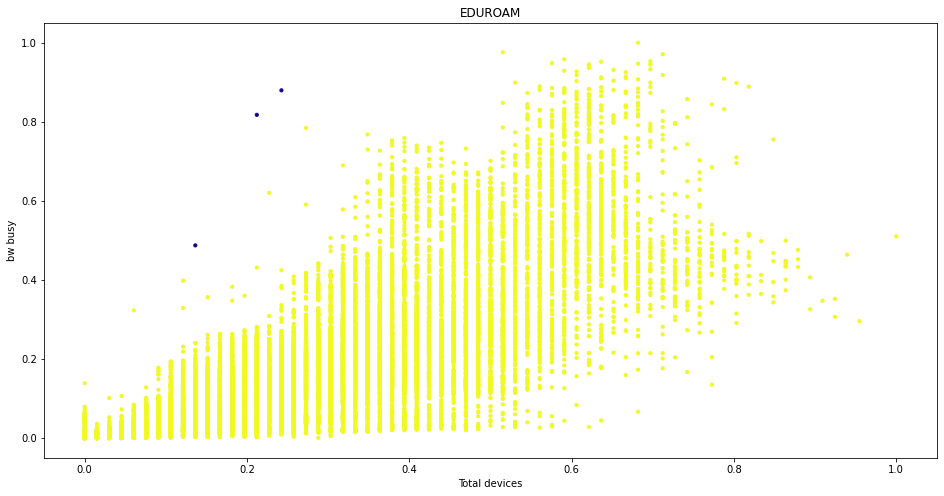

In [27]:
# Normalize
min_max_scaler_eduroam = preprocessing.MinMaxScaler()
df_escalado_eduroam = min_max_scaler_eduroam.fit_transform(df_channel_eduroam_filter)
df_escalado_eduroam = pd.DataFrame(df_escalado_eduroam)
df_escalado_eduroam = df_escalado_eduroam.rename(columns= {0 : 'bw_busy', 1: 'total_devices'})

# DBSCAN
dbscan_eduroam = DBSCAN(eps= 0.08, min_samples= 4).fit(df_escalado_eduroam)
cluster_eduroam = dbscan_eduroam.fit_predict(df_escalado_eduroam)

# Add to dataFrame
df_channel_eduroam_filter['Cluster'] = cluster_eduroam

# Asign x and y
x = df_escalado_eduroam['total_devices'].values # total_devices
y = df_escalado_eduroam['bw_busy'].values # bw_busy

# Plot the clusters
plt.figure(figsize=(16,8))
plt.title("EDUROAM")
plt.scatter(x, y, c = cluster_eduroam, cmap= "plasma", s=10) # plotting the clusters ## XQ CON df.iloc FUNCIONA PERO CON df NO?
plt.xlabel("Total devices") # X-axis label
plt.ylabel("bw busy") # Y-axis label
plt.show() # showing the plot
